In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#for plotting
import seaborn as sns
import matplotlib.pyplot as plt

#read the data
wine = pd.read_csv('winequality-red.csv')

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Let's fix the messy column names to make it easier to call them.

In [11]:
wine.columns = wine.columns.str.strip().str.lower().str.replace(' ', '_')

wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Visualization

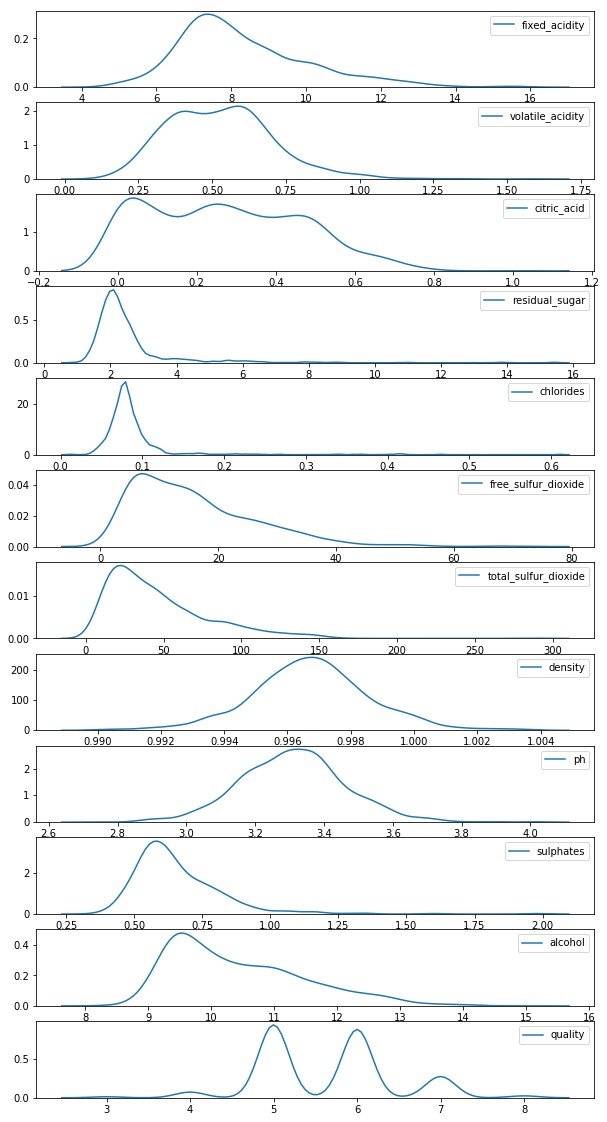

In [15]:
fig, ax = plt.subplots(12, 1, figsize=(10, 20))

sns.kdeplot(wine.fixed_acidity, ax=ax[0])
sns.kdeplot(wine.volatile_acidity, ax=ax[1])
sns.kdeplot(wine.citric_acid, ax=ax[2])
sns.kdeplot(wine.residual_sugar, ax=ax[3])
sns.kdeplot(wine.chlorides, ax=ax[4])
sns.kdeplot(wine.free_sulfur_dioxide, ax=ax[5])
sns.kdeplot(wine.total_sulfur_dioxide, ax=ax[6])
sns.kdeplot(wine.density, ax=ax[7])
sns.kdeplot(wine.ph, ax=ax[8])
sns.kdeplot(wine.sulphates, ax=ax[9])
sns.kdeplot(wine.alcohol, ax=ax[10])
sns.kdeplot(wine.quality, ax=ax[11])


# Box Plotting

Since we are working with discrete data, we'll look at the fatures against out response variable (quality).

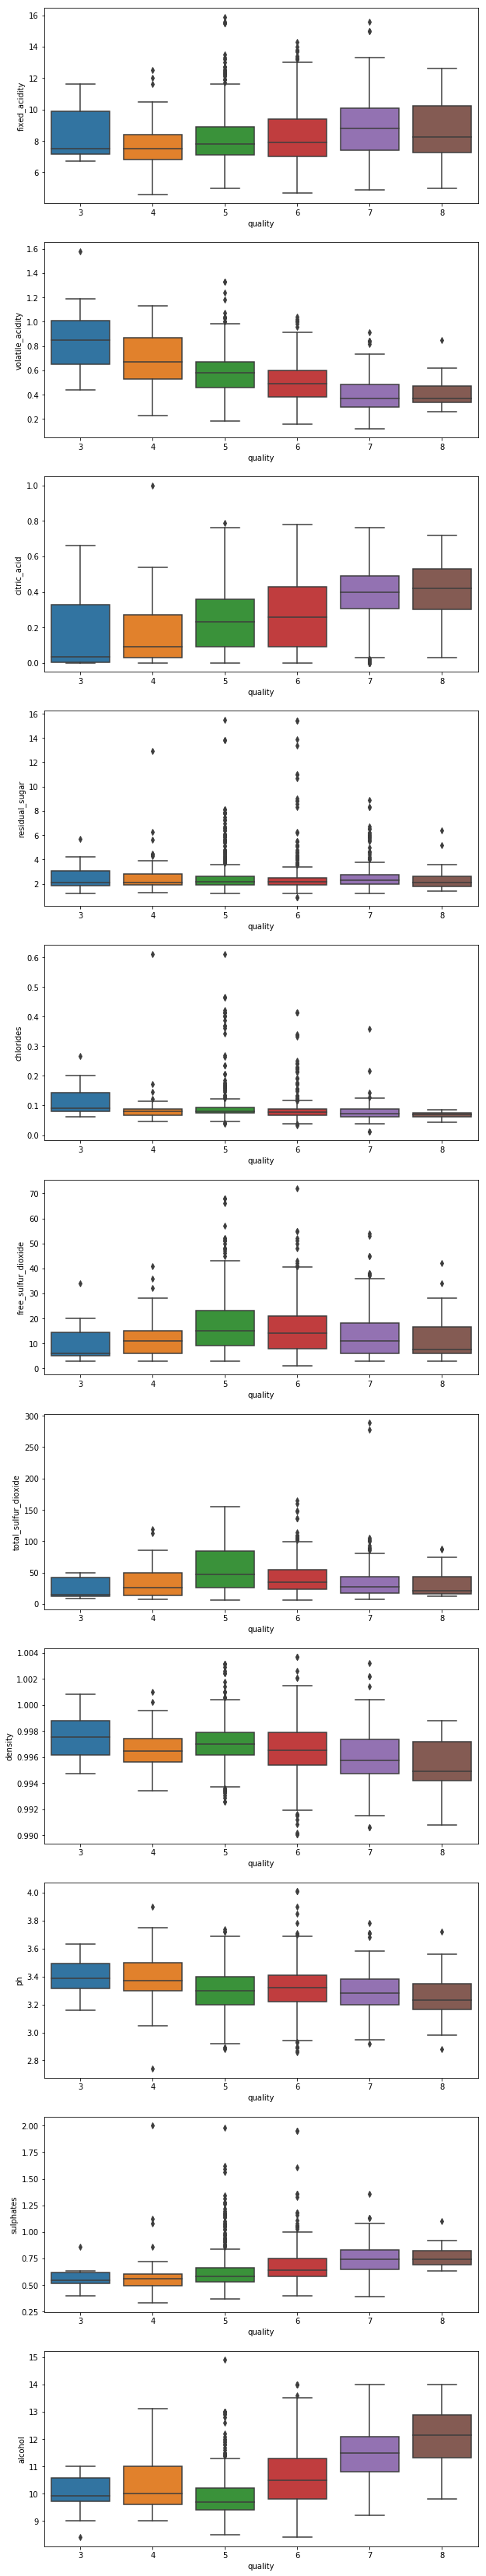

In [42]:
fig, ax = plt.subplots(11, 1, figsize=(10, 60))

sns.boxplot(y="fixed_acidity", x= "quality", data=wine, ax=ax[0])
sns.boxplot(y="volatile_acidity", x= "quality", data=wine, ax=ax[1])
sns.boxplot(y="citric_acid", x= "quality", data=wine, ax=ax[2])
sns.boxplot(y="residual_sugar", x= "quality", data=wine, ax=ax[3])
sns.boxplot(y="chlorides", x= "quality", data=wine, ax=ax[4])
sns.boxplot(y="free_sulfur_dioxide", x= "quality", data=wine, ax=ax[5])
sns.boxplot(y="total_sulfur_dioxide", x= "quality", data=wine, ax=ax[6])
sns.boxplot(y="density", x= "quality", data=wine, ax=ax[7])
sns.boxplot(y="ph", x= "quality", data=wine, ax=ax[8])
sns.boxplot(y="sulphates", x= "quality", data=wine, ax=ax[9])
sns.boxplot(y="alcohol", x= "quality", data=wine, ax=ax[10])

# Regression Before Scaling
Let's see how building a model will work without scaling the data.

In [4]:
x = wine.iloc[:, :11]
y = wine.iloc[:, 11].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)

r1 = LinearRegression().fit(x_train, y_train)

y_pred = r1.predict(x_test)

#Coefficients
print('intercept (b0): ', r1.intercept_) #will print multiple values b/c we are predicting on all features.
print('slope (b1): ', r1.coef_)

#R^2
r_sq = r1.score(x, y)
print('R squared: ', r_sq)

#RMSE value
rss = ((y_test-y_pred)**2).sum()
mse = np.mean((y_test-y_pred)**2)
print("Final rmse value is =", np.sqrt(np.mean((y_test-y_pred)**2)))


intercept (b0):  36.12503545082784
slope (b1):  [ 3.96960125e-02 -1.25831763e+00 -2.97220322e-01  2.07841870e-02
 -1.65663922e+00  6.39769593e-03 -3.40554432e-03 -3.24402926e+01
 -3.54064112e-01  8.90110115e-01  2.87527808e-01]
R squared:  0.35748826004325485
Final rmse value is = 0.6901609910448495


# Scaling
We will scale our data before we run any type of regression on it.
By scaling the data, it will be easier to compare the variables on equal grounds.

In [2]:
from sklearn.preprocessing import StandardScaler

x = wine.iloc[:,:11]
y = wine.iloc[:, 11].values
sc = StandardScaler()
x = sc.fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)


In [3]:
#Now let's split our data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=.25)

# Linear Regression

In [17]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

#Fitting the regression to the training set
regressor = LinearRegression().fit(x_train, y_train)

#Predict the test result
y_pred = regressor.predict(x_test)

#Coefficients
print('intercept (b0): ', regressor.intercept_) #will print multiple values b/c we are predicting on all features.
print('slope (b1): ', regressor.coef_)

#R^2
r_sq = regressor.score(x_new, y)
print('R squared: ', r_sq)

#RMSE value
rss = ((y_test-y_pred)**2).sum()
mse = np.mean((y_test-y_pred)**2)
print("Final rmse value is =", np.sqrt(np.mean((y_test-y_pred)**2)))

intercept (b0):  5.646411486392508
slope (b1):  [ 0.04296868 -0.23686122  0.25450068 -0.03514509  0.08239806 -0.02459969
 -0.10595942  0.10526789]
R squared:  0.34577198004347465
Final rmse value is = 0.6530480420717437


# SVR

In [12]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf', gamma = 'scale')
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

#R^2
r_sq = regressor.score(x_new, y)
print('R squared: ', r_sq)

#RMSE value
rss = ((y_test-y_pred)**2).sum()
mse = np.mean((y_test-y_pred)**2)
print("RMSE: ", np.sqrt(np.mean((y_test-y_pred)**2)))

R squared:  0.48793237697493186
RMSE:  0.6122504606428562


# Decision Tree

In [13]:
from sklearn.tree import DecisionTreeRegressor
r_tree = DecisionTreeRegressor(random_state=0)
r_tree.fit(x_train, y_train)

y_pred = r_tree.predict(x_test)

#R^2
r_sq = r_tree.score(x_new, y)
print('R squared: ', r_sq)

#RMSE value
rss = ((y_test-y_pred)**2).sum()
mse = np.mean((y_test-y_pred)**2)
print("RMSE", np.sqrt(np.mean((y_test-y_pred)**2)))



R squared:  0.7524384579656294
RMSE 0.8031189202104505


# Random Forest

In [14]:
from sklearn.ensemble import RandomForestRegressor
r_forest = RandomForestRegressor(n_estimators = 100, random_state=0)
r_forest.fit(x_train, y_train)

y_pred = r_forest.predict(x_test)

#R^2
r_sq = r_forest.score(x_new, y)
print('R squared: ', r_sq)

#RMSE value
rss = ((y_test-y_pred)**2).sum()
mse = np.mean((y_test-y_pred)**2)
print("RMSE: ", np.sqrt(np.mean((y_test-y_pred)**2)))

R squared:  0.806871771676082
RMSE:  0.58806696047304


Now, by comparing the scores of the four models above, we see that the Random Forest predicted the best out of all of them!